In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
imagen = cv2.imread('PSI_Tray031_2015-12-27--09-03-57_top.png')

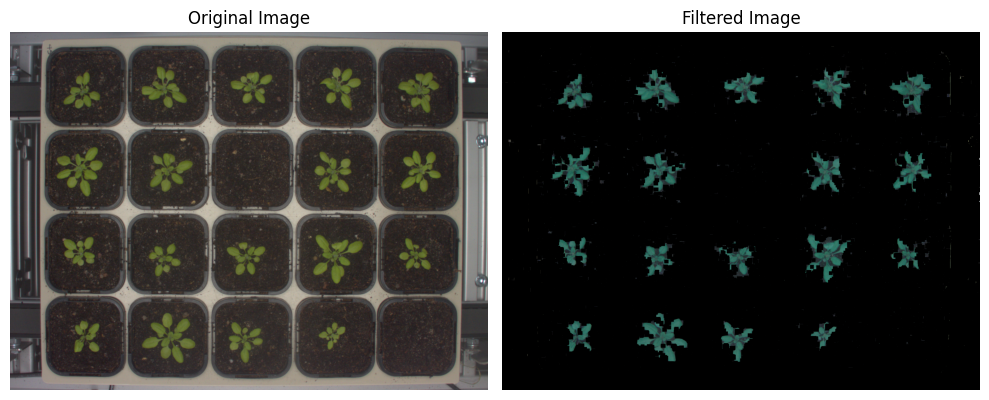

In [42]:
# Convert the image from BGR to RGB (Matplotlib uses RGB)
imagen_rgb = cv2.cvtColor(imagen , cv2.COLOR_BGR2RGB)

# Convert the image to HSV
imagen_hsv = cv2.cvtColor(imagen , cv2.COLOR_BGR2HSV)

# Definir un rango para los valores de verde en HSV
verde_bajo = np.array([40, 80, 50])   # Valores bajos de H, S, V para verde en HSV
verde_alto = np.array([80, 255, 255]) # Valores altos de H, S, V para verde en HSV

# Crear una máscara con los píxeles que están dentro del rango de verde
mascara_verde = cv2.inRange(imagen_hsv, verde_bajo, verde_alto)

# Aplicar una operación de apertura para eliminar el ruido
kernel = np.ones((7, 7), np.uint8)  # Kernel para la operación morfológica (puede ajustarse según necesites)
mascara_verde = cv2.morphologyEx(mascara_verde, cv2.MORPH_CLOSE, kernel)

# Aplicar la máscara sin ruido a la imagen original
resultado = cv2.bitwise_and(imagen, imagen, mask=mascara_verde)

# Display the original image and the filtered image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(imagen_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Filtered Image')
plt.imshow(resultado)
plt.axis('off')

plt.tight_layout()
plt.show()